This is an analysis of the Collection of SMS. This contains two fields one dependent variable and other other actual text message.

In [105]:
sms_corp<-read.csv('sms_spam.csv')

In [106]:
str(sms_corp) #getting familiar of data in data set

'data.frame':	5574 obs. of  2 variables:
 $ Type: Factor w/ 2 levels "ham","spam": 1 1 2 1 1 2 1 1 2 2 ...
 $ Text: Factor w/ 5171 levels "'An Amazing Quote'' - \"Sometimes in life its difficult to decide whats wrong!! a lie that brings a smile or the truth that bri"| __truncated__,..: 1147 3249 1046 4278 2895 1071 977 409 4765 1282 ...


Let's split the data into train and test set.

In [107]:
train_set<-sms_corp[1:4179, ]
test_set<-sms_corp[4179:5574, ]

On both training and test sets, data preprocessing is done including the removing numbers, punctuations, whitespaces,stop words, performing stemming, changing case to Lower. In doing all first a corpus should be developed. 

In [4]:
library(tm)

Warning message:
"package 'tm' was built under R version 3.3.3"Loading required package: NLP


In [108]:
sms_train_corpus<-VCorpus(VectorSource(x=train_set$Text))#Text is present in second column of the data set.

In [109]:
as.character(sms_train_corpus[[1]])#printing the first element in corpus

[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [110]:
clean_train_corpus<-tm_map(sms_train_corpus, content_transformer(tolower))#Applying the tolower transformation

In [111]:
as.character(clean_train_corpus[[1]])#Result after the applying the tolower method

[1] "go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."

In [112]:
#Since the removePunctuation method remove the punctuation and trims the space between words 
#we might loose sme information. So new function was written where punctuations are removed and replaced with 
#white space
replacePunctuation <- function(x) {
  gsub("[[:punct:]]+", " ", x)
}

In [113]:
clean_train_corpus<-tm_map(clean_train_corpus, content_transformer(replacePunctuation))

In [114]:
as.character(clean_train_corpus[[1]])

[1] "go until jurong point  crazy  available only in bugis n great world la e buffet  cine there got amore wat "

In [115]:
clean_train_corpus<-tm_map(clean_train_corpus, content_transformer(FUN = removeNumbers))#removing numbers
clean_train_corpus<-tm_map(clean_train_corpus, removeWords, stopwords())#removing stop words

In [116]:
library(SnowballC)#Performing stemming and removing white spaces
clean_train_corpus<-tm_map(clean_train_corpus, stemDocument)
clean_train_corpus<-tm_map(clean_train_corpus, stripWhitespace)

In [117]:
as.character(clean_train_corpus[[1]])

[1] "go jurong point crazi avail bugi n great world la e buffet cine got amor wat"

In [118]:
#Creating the Document Term matrix
sms_train_dtm<-DocumentTermMatrix(clean_train_corpus)

In [120]:
#Labes for the corresponding text corpus
sms_train_labels<-sms_corp[1:4179, ]$Type

Visualizing the train set corpus

In [121]:
library(wordcloud)

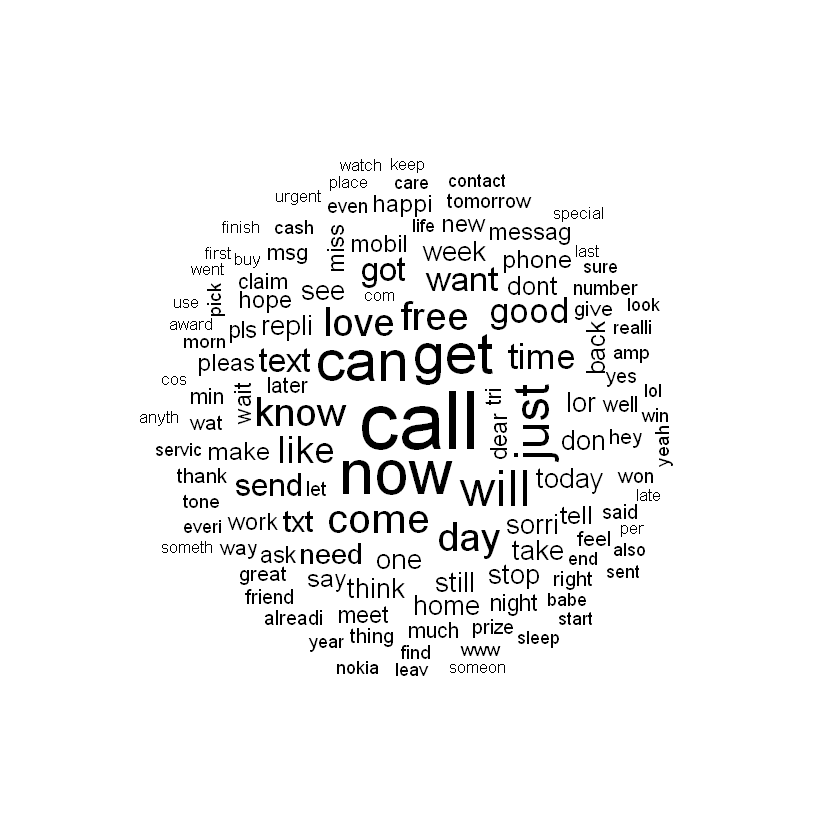

In [122]:
wordcloud(clean_train_corpus, min.freq=50, random.order = FALSE)

Words that are bold are more frequent. Let's look the spam and ham  corpus individually

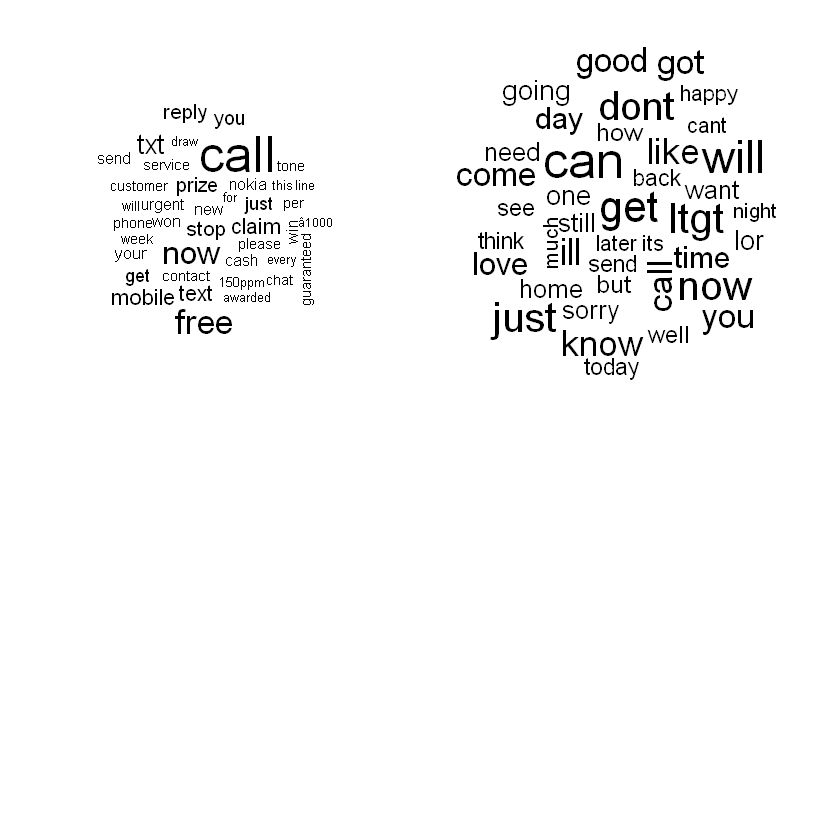

In [123]:
spam<-subset(train_set, train_set$Type=="spam")
ham<-subset(train_set, train_set$Type=="ham")
par(mfrow=c(2,2))
wordcloud(spam$Text,max.words = 40, scale=c(3,0.5))
wordcloud(ham$Text,max.words = 40, scale=c(3,0.5))

Finding the most frequent words in corpus. Here frquency is given as 5.

In [124]:
sms_train_freq<-findFreqTerms(sms_train_dtm, 5)

Doing the sae preprocessing on test set

In [125]:
sms_test_corpus<-VCorpus(VectorSource(x=test_set$Text))
clean_test_corpus<-tm_map(sms_test_corpus, content_transformer(FUN = tolower))
clean_test_corpus<-tm_map(clean_test_corpus, content_transformer(FUN = removeNumbers))
clean_test_corpus<-tm_map(clean_test_corpus, content_transformer(FUN = replacePunctuation))
clean_test_corpus<-tm_map(clean_test_corpus, removeWords, stopwords())
clean_test_corpus<-tm_map(clean_test_corpus, stemDocument)
clean_test_corpus<-tm_map(clean_test_corpus, stripWhitespace)
clean_test_corpus <- tm_map(clean_test_corpus,PlainTextDocument)
sms_test_dtm<-DocumentTermMatrix(clean_test_corpus)
sms_test_labels<-sms_corp[4179:5574, ]$Type

Visualizing the test corpus

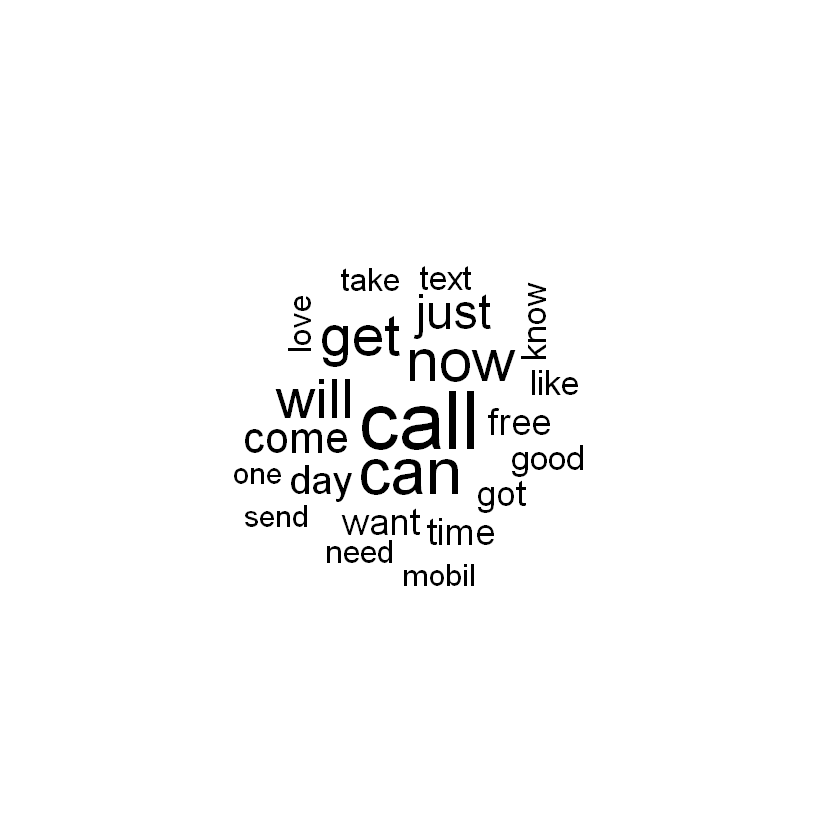

In [126]:
wordcloud(clean_test_corpus, min.freq=50, random.order = FALSE)

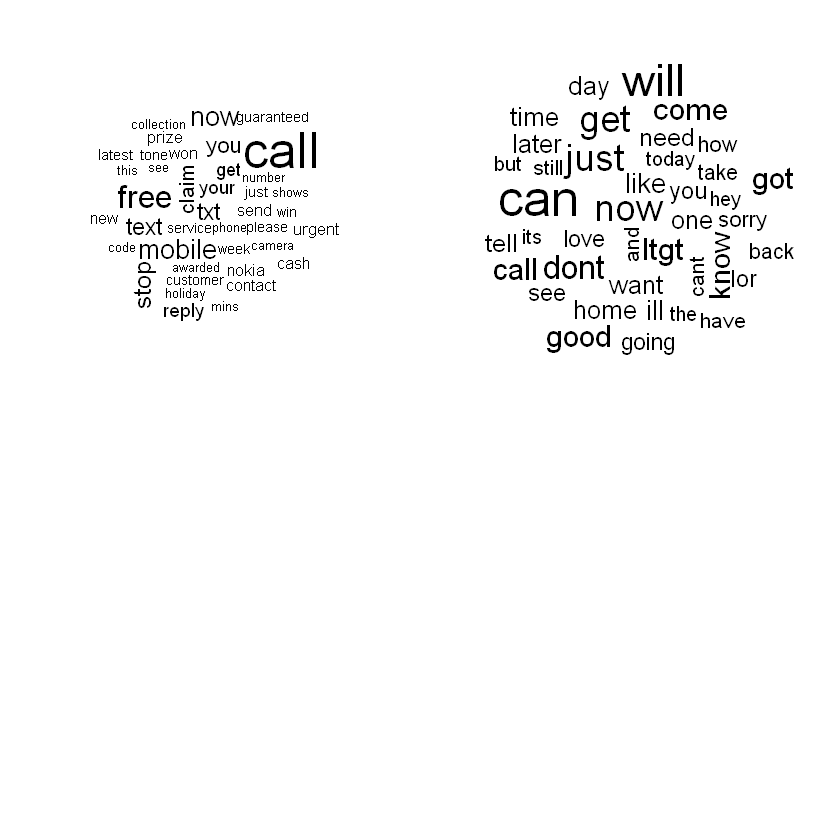

In [127]:
spam<-subset(test_set, test_set$Type=="spam")
ham<-subset(test_set, test_set$Type=="ham")
par(mfrow=c(2,2))
wordcloud(spam$Text,max.words = 40, scale=c(3,0.5))
wordcloud(ham$Text,max.words = 40, scale=c(3,0.5))

In [128]:
sms_test_freq<-findFreqTerms(sms_test_dtm, 5)#Finding the frequent terms in test corpus

In [129]:
#Considering the columns that occured frequently 
sms_train<-sms_train_dtm[, sms_train_freq]
sms_test<-sms_test_dtm[, sms_test_freq]

In [130]:
#Since the document term matrix consists of 0 and 1, it should be chnaged to categorical 
#varibles to build model using NaiveBayes
convert_counts<-function(x){
  x<-ifelse(x>0, 'Yes', 'No')
}

In [131]:
#Applying the above function on Document Term Matrix
sms_train_converted<-apply(sms_train, MARGIN = 2, convert_counts)
sms_test_converted<-apply(sms_test, MARGIN = 2, convert_counts)

In [103]:
library(e1071)

In [132]:
spam_model <- naiveBayes(sms_train_converted,sms_train_labels)#Applying naivebayes method.

In [133]:
sms_predicted<-predict(spam_model, sms_test_converted)

In [135]:
library(gmodels)
CrossTable(x=sms_predicted, y=sms_test_labels, dnn=c("predicted", "actual"))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1396 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1204 |        19 |      1223 | 
             |    18.546 |   123.710 |           | 
             |     0.984 |     0.016 |     0.876 | 
             |     0.992 |     0.104 |           | 
             |     0.862 |     0.014 |           | 
-------------|-----------|-----------|-----------|
        spam |        10 |       163 |       173 | 
             |   131.110 |   874.549 |           | 
             |     0.058 |     0.942 |     0.124 | 
             |     0.008 |     0.896 |           | 
             |     0.007 |     0.117 |           | 
-------------|-----------|-----------|-------

To Increase the model performance, Laplace estimator is introduced into model. Since Naivebayes considers all the independent variables into account, ther might be a chance the likelyhood can be zero and hence the probability of entire term will be zero. So laplace estimates introduces a default value to variables.

In [136]:
laplace_included_model<-naiveBayes(sms_train_converted,sms_train_labels, laplace = 1)

In [139]:
spam_predicted_laplase<-predict(laplace_included_model, sms_test_converted)

In [142]:
CrossTable(x=spam_predicted_laplase, y=sms_test_labels, dnn=c("predicted", "actual"))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1396 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1206 |        19 |      1225 | 
             |    18.585 |   123.967 |           | 
             |     0.984 |     0.016 |     0.878 | 
             |     0.993 |     0.104 |           | 
             |     0.864 |     0.014 |           | 
-------------|-----------|-----------|-----------|
        spam |         8 |       163 |       171 | 
             |   133.137 |   888.066 |           | 
             |     0.047 |     0.953 |     0.122 | 
             |     0.007 |     0.896 |           | 
             |     0.006 |     0.117 |           | 
-------------|-----------|-----------|-------

By applying the laplace estimator, number of false negatives are reduced.